In [1]:
%matplotlib inline
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

# Read data from wandb api or alternatively from text file

API key must be set up in command line using
$ wandb login

In [4]:
api = wandb.Api()
#nano = api.run("jer2ig/train/156sth06")
#nano = api.run("jer2ig/YOLOv5/3gyxq19k")
#nano = api.run("jer2ig/train/3o0xk9mx")
nano = api.run("jer2ig/train/1c4v5l6j") # Hyperparamters
#medium = api.run("jer2ig/train/1tr9hmui")

# Plot data

C:\Users\Julius\AppData\Local\Temp/ipykernel_22628/2978115262.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


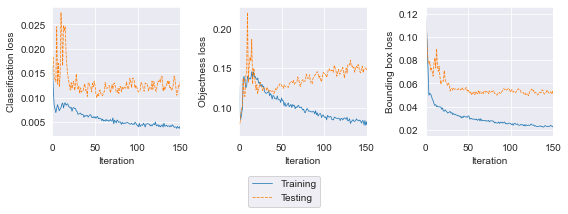

In [10]:
fig, ax = plt.subplots(1, 3,sharex= 'col', figsize=(8, 2.5))


sns.lineplot(data=runs.filter(regex="cls_loss"),legend=None, ax=ax[0], linewidth=.75)
ax[0].set_ylabel("Classification loss")
ax[0].set_xlabel("Iteration")
ax[0].set_xlim(0,150)
sns.lineplot(data=runs.filter(regex="obj_loss"),legend=None, ax=ax[1], linewidth=.75)
ax[1].set_ylabel("Objectness loss")
ax[1].set_xlabel("Iteration")
ax[1].set_xlim(0,150)
sns.lineplot(data=runs.filter(regex="box_loss"),legend=None, ax=ax[2], linewidth=.75)
ax[2].set_xlabel("Iteration")
ax[2].set_ylabel("Bounding box loss")
ax[2].set_xlim(0,150)

#fig.legend(labels=["yolo5n","yolo5m"],loc='lower center', bbox_to_anchor=(0.5, -0.05))
fig.tight_layout()
fig.legend(labels=["Training","Testing"],loc='lower center', bbox_to_anchor=(0.5, -0.2), bbox_transform=plt.gcf().transFigure)
fig.show()
#fig.subplots_adjust(bottom=0.2)
fig.savefig('hyp_loss.pdf', bbox_inches='tight')

C:\Users\Julius\AppData\Local\Temp/ipykernel_22628/68358107.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


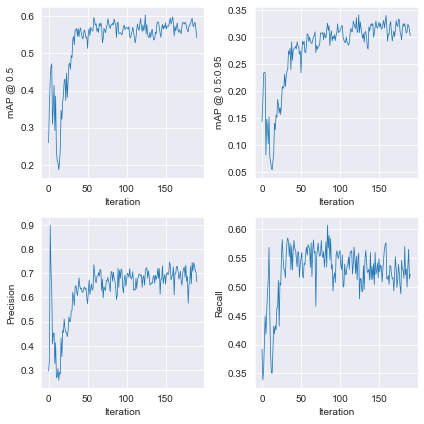

In [5]:
nano_hist = nano.history(x_axis="_step", pandas=(True), stream="default")
nano_hist = nano_hist.rename(columns=lambda c: "nano:"+str(c))
#medium_hist = medium.history(x_axis="_step", pandas=(True), stream="default")
#medium_hist = medium_hist.rename(columns=lambda c: "medium:"+str(c))

#runs = pd.concat([nano_hist, medium_hist], axis=1)
runs = nano_hist
runs = runs.reindex(sorted(runs.columns), axis=1)
fig, ax = plt.subplots(2, 2, figsize=(6, 6))

sns.lineplot(data=runs.filter(regex="mAP_0.5$"),legend=None, ax=ax[0,0], linewidth=.75)
ax[0,0].set_xlabel("Iteration")
ax[0,0].set_ylabel("mAP @ 0.5")
sns.lineplot(data=runs.filter(regex="mAP_0.5:0.95"),legend=None, ax=ax[0,1], linewidth=.75)
ax[0,1].set_xlabel("Iteration")
ax[0,1].set_ylabel("mAP @ 0.5:0.95")
sns.lineplot(data=runs.filter(regex="precision"),legend=None, ax=ax[1,0], linewidth=.75)
ax[1,0].set_xlabel("Iteration")
ax[1,0].set_ylabel("Precision")
sns.lineplot(data=runs.filter(regex="recall"),legend=None, ax=ax[1,1], linewidth=.75)
ax[1,1].set_xlabel("Iteration")
ax[1,1].set_ylabel("Recall")

fig.tight_layout()
#fig.legend(labels=["yolo5n","yolo5m"],loc='right', bbox_to_anchor=(1.2, 0.5), bbox_transform=plt.gcf().transFigure)
fig.show()
#fig.savefig('baseb_perf.pdf', bbox_inches='tight')


C:\Users\Julius\AppData\Local\Temp/ipykernel_21332/3784192549.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


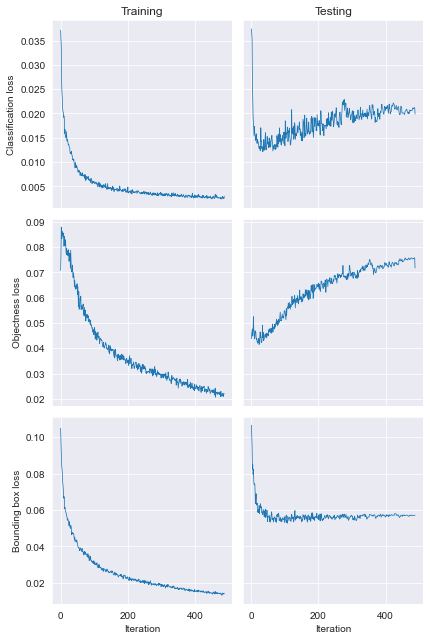

In [8]:
fig, ax = plt.subplots(3, 2,sharey='row',sharex= 'col', figsize=(6, 9))

ax[0,0].set_title("Training")
ax[0,1].set_title("Testing")

sns.lineplot(data=runs.filter(regex="train/cls_loss"),legend=None, ax=ax[0,0], linewidth=.75)
ax[0,0].set_ylabel("Classification loss")
sns.lineplot(data=runs.filter(regex="train/obj_loss"),legend=None, ax=ax[1,0], linewidth=.75)
ax[1,0].set_ylabel("Objectness loss")
sns.lineplot(data=runs.filter(regex="train/box_loss"),legend=None, ax=ax[2,0], linewidth=.75)
ax[2,0].set_xlabel("Iteration")
ax[2,0].set_ylabel("Bounding box loss")
sns.lineplot(data=runs.filter(regex="val/cls_loss"),legend=None, ax=ax[0,1], linewidth=.75)
sns.lineplot(data=runs.filter(regex="val/obj_loss"),legend=None, ax=ax[1,1], linewidth=.75)
sns.lineplot(data=runs.filter(regex="val/box_loss"),legend=None, ax=ax[2,1], linewidth=.75)
ax[2,1].set_xlabel("Iteration")

#fig.legend(labels=["yolo5n","yolo5m"],loc='lower center', bbox_to_anchor=(0.5, -0.05))
fig.tight_layout()
#fig.legend(labels=["yolo5n","yolo5m"],loc='right', bbox_to_anchor=(1.2, 0.5), bbox_transform=plt.gcf().transFigure)
fig.show()
#fig.subplots_adjust(bottom=0.2)
fig.savefig('trial_loss.pdf', bbox_inches='tight')

# Attempt to plot using plotly

Plotly was investigated as it promised superior plots and a simple interface. Unfortunately it turned out that this is only the case for select type of plots and particularly subplots are clunky. Therefore this code stands as a warning to anyone who wants to use plotly.
The pros however are that the plot does look better and is interactive. The effort could be justified if not using pdf's  and dynamic data exploration is desired.

In [ ]:
nano_hist = nano.history(x_axis="_step", pandas=(True), stream="default")
#nano_hist = nano_hist.rename(columns=lambda c: "nano:"+str(c))
medium_hist = medium.history(x_axis="_step", pandas=(True), stream="default")
#medium_hist = medium_hist.rename(columns=lambda c: "medium:"+str(c))

#runs = pd.concat([nano_hist, medium_hist], axis=1)
#print(runs)
cols = plotly.colors.DEFAULT_PLOTLY_COLORS
fig = make_subplots(rows=1, cols=2,horizontal_spacing = 0.5)
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.add_trace(go.Scatter(
    x=nano_hist["_step"],
    y=nano_hist["metrics/precision"],
    name="yolo5n",
    legendgroup="yolo5n",
    legendrank=1,
    line=dict(color=cols[0])),
    row=1, col=1)
fig.add_trace(go.Scatter(
    x=nano_hist["_step"],
    y=nano_hist["metrics/mAP_0.5"],
    name="yolo5n",
    legendgroup="yolo5n",
    legendrank=1,
    showlegend=False,
    line=dict(color=cols[0])),
    row=1, col=2)
fig.add_trace(go.Scatter(
    x=medium_hist["_step"],
    y=medium_hist["metrics/precision"],
    name="yolo5m",
    legendgroup="yolo5m",
    legendrank=2,
    line=dict(color=cols[1])),
    row=1, col=1)
fig.add_trace(go.Scatter(
    x=medium_hist["_step"],
    y=medium_hist["metrics/mAP_0.5"],
    name="yolo5m",
    legendgroup="yolo5m",
    legendrank=2,
    showlegend=False,
    line=dict(color=cols[1])),
    row=1, col=2)
fig.update_xaxes(title_text="Iterations", row=1, col=1)
fig.update_xaxes(title_text="Iterations", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=1)
fig.update_yaxes(title_text="mAp @ 0.5", row=1, col=2)
plotly.io.templates.default = "plotly_white"
#fig = px.line(runs, x="medium:_step", y=["nano:metrics/precision","medium:metrics/precision"], labels={
#                     "medium:_step": "Iteration",
#                     "nano:metrics/precision": "Precision",
#                 })

fig.show()
plotly.io.write_image(fig, 'perf.pdf', format='pdf')
#plt.plot(nano_hist["_step"], nano_hist["metrics/precision"])


This was an attempt to be smart and use plotly's df capabilities. It is however ruined by the shared y-axis and the inability to reshape the plot to a more sensible layout.

In [ ]:
nano_hist = nano.history(x_axis="_step", pandas=(True), stream="default")
nano_hist["name"] = 1
medium_hist = medium.history(x_axis="_step", pandas=(True), stream="default")
medium_hist["name"] = 2
runs = pd.concat([nano_hist, medium_hist], axis=0)
#print(runs["name"])
runs = runs.melt(id_vars=["_step", "name"])
print(runs)
px.line(runs,x="_step",y="value",color="name", facet_col="variable")